In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import shap
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [2]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"
data=pd.read_csv(URL)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [4]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
data['Revenue'] = data['Revenue'].astype(int)
data['Weekend'] = data['Weekend'].astype(int)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


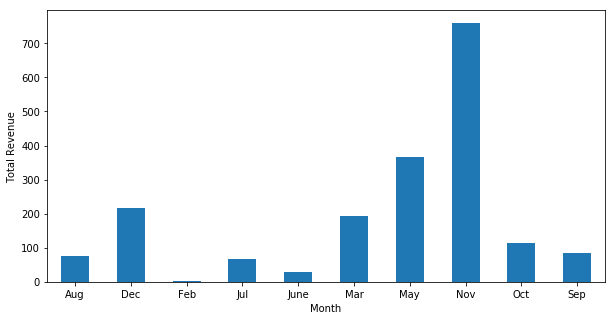

In [6]:
# Total Revenue by month.

monthly_revenue = data.groupby(['Month'])[['Revenue']].agg('sum')
graph = monthly_revenue.unstack().plot(kind='bar', figsize=(10,5))
plt.xticks(np.arange(10), sorted(data.Month.unique()), rotation=0)
graph.set_xlabel('Month')
graph.set_ylabel('Total Revenue')
plt.show()


Highest Revenue is in the month of November

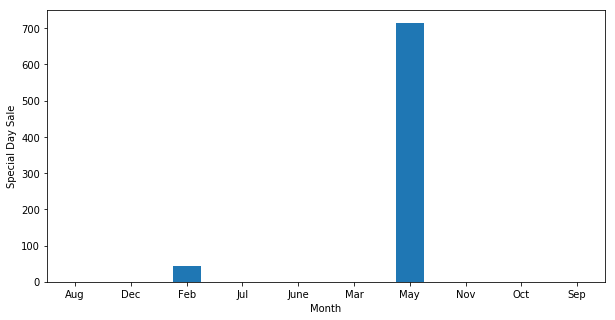

In [7]:
specialDay_data = data.groupby(['Month'])[['SpecialDay']].agg('sum')
graph = specialDay_data.unstack().plot(kind='bar', figsize=(10,5))
plt.xticks(np.arange(10), sorted(data.Month.unique()), rotation=0)
graph.set_xlabel('Month')
graph.set_ylabel('Special Day Sale')
plt.show()


May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64


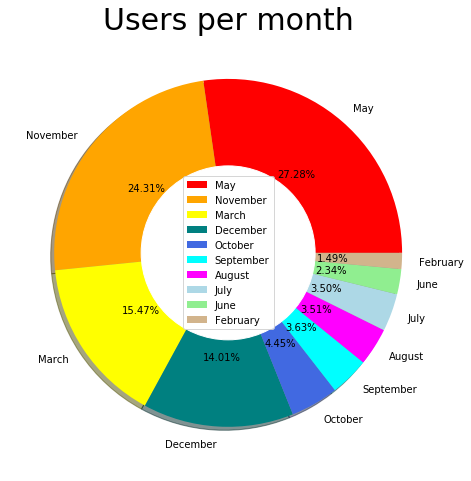

In [8]:
#checking the months with most no.of customers visiting the online shopping sites
print(data['Month'].value_counts())

# plotting a pie chart for share of customers per month
plt.rcParams['figure.figsize'] = (20, 8)
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['red', 'orange', 'yellow', 'teal', 'royalblue', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'tan']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.5, color = 'white')

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels,  explode=explode, shadow = True, autopct = '%.2f%%')
plt.title('Users per month', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend(loc='center')
plt.show()


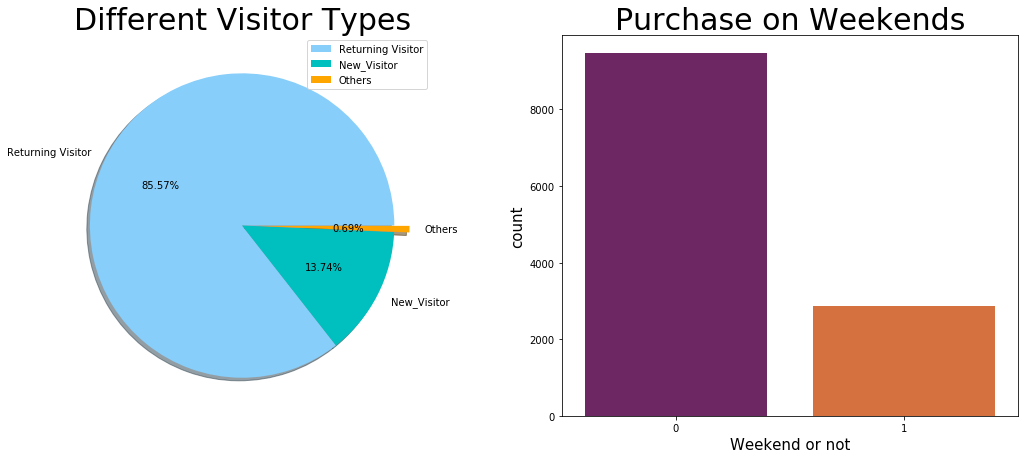

In [9]:
# plotting a pie chart for different Visitors

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['lightskyblue', 'c', 'orange']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitor Types', fontsize = 30)
plt.axis('off')
plt.legend()

# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(data['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

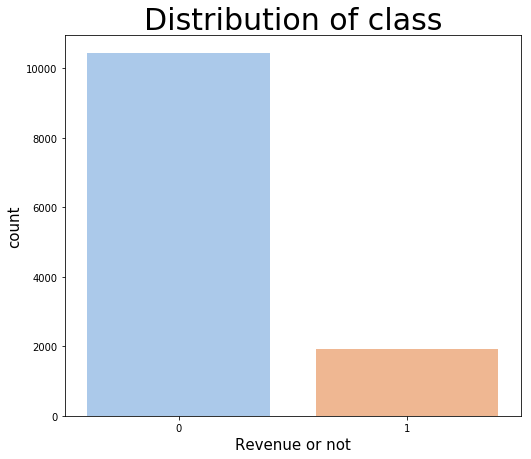

In [10]:
# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.countplot(data['Revenue'], palette = 'pastel')
plt.title('Distribution of class', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

## Bivariate Analysis

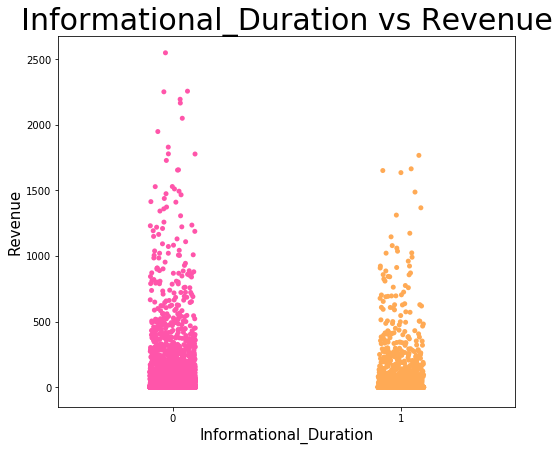

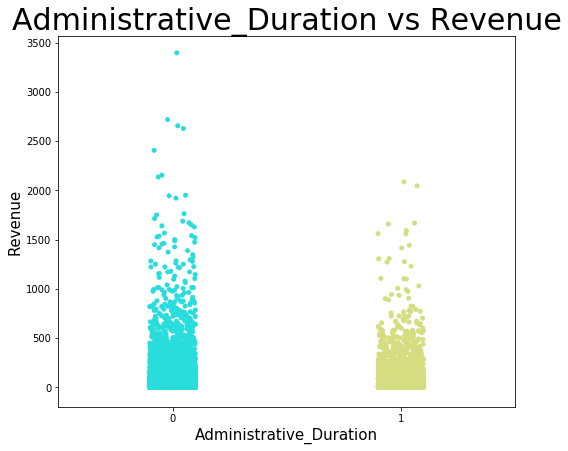

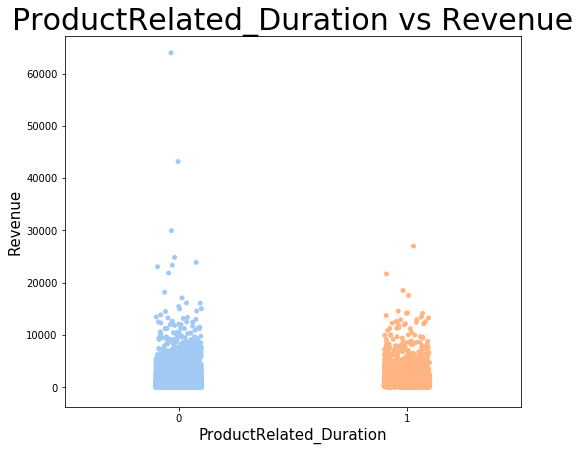

In [11]:
# Informational_Duration, Administrative_Duration, product related duration vs revenue

plt.rcParams['figure.figsize'] = (18, 15)

labels = ['Informational_Duration', 'Administrative_Duration', 'ProductRelated_Duration']
palettes = ['spring', 'rainbow', 'pastel']

for index, label in enumerate(labels):
    plt.subplot(2, 2, 1)
    sns.stripplot(data['Revenue'], data[label], palette = palettes[index])
    title = label + ' vs Revenue' 
    plt.title(title, fontsize = 30)
    plt.xlabel(label, fontsize = 15)
    plt.ylabel('Revenue', fontsize = 15)
    plt.show()


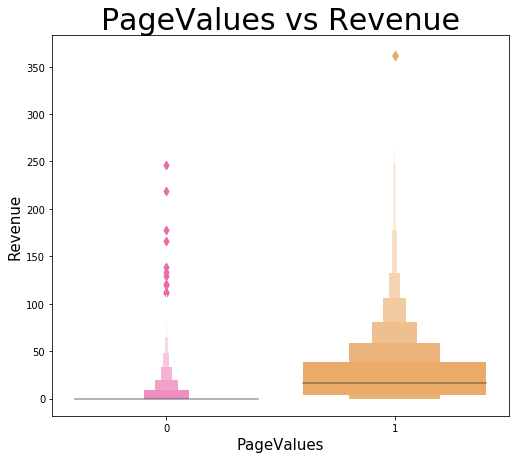

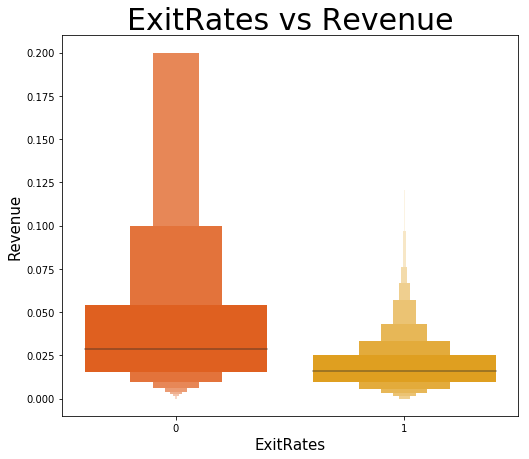

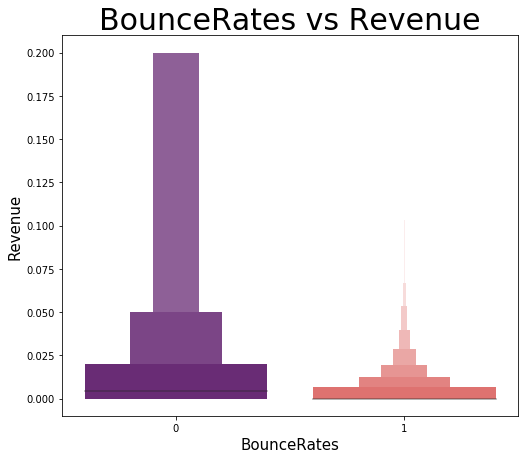

In [12]:
plt.rcParams['figure.figsize'] = (18, 7)
labels = ['PageValues', 'ExitRates', 'BounceRates']
palettes = ['spring', 'autumn', 'magma']

for index, label in enumerate(labels):
    plt.subplot(1, 2, 1)
    sns.boxenplot(data['Revenue'], data[label], palette = palettes[index])
    title = label + ' vs Revenue' 
    plt.title(title, fontsize = 30)
    plt.xlabel(label, fontsize = 15)
    plt.ylabel('Revenue', fontsize = 15)
    plt.show()


In [13]:
# Converting non-numeric values to numbers

# Assigning numbers to Months
temp_data = data
month_map={'Feb':2,'Mar':3,'May':5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
temp_data['Month']=temp_data['Month'].map(month_map)

#Assigning numbers to Visitor Type
vistor_map={'New_Visitor':0,'Returning_Visitor':1,'Other':2}
temp_data['VisitorType']=temp_data['VisitorType'].map(vistor_map)
temp_data['Weekend'] = temp_data['Weekend'].astype(int)

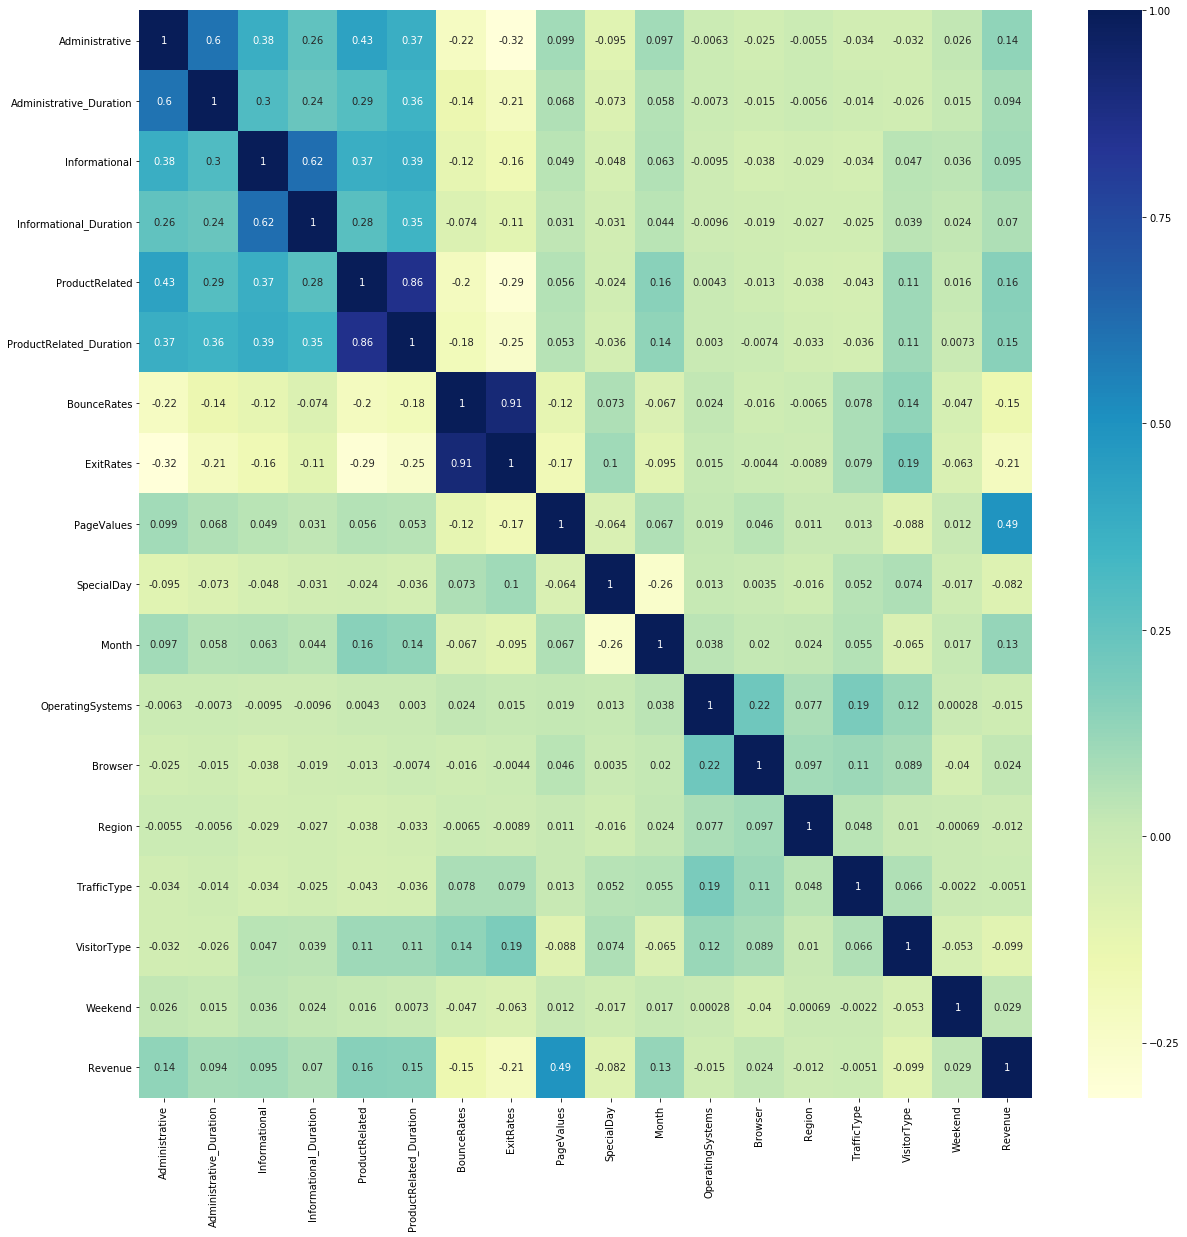

In [14]:
# Correlations between features.

correlations=temp_data.corr()
correlations

plt.figure(figsize=(20,20))
sns.heatmap(correlations,xticklabels=correlations.columns,yticklabels=correlations.columns,annot=True, cmap="YlGnBu")

In [15]:
temp_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,1,0


## Modeling

### Helper Methods

In [16]:
# Method to split data into for Training and Testing.

def split_data(myData, testSize, className = 'Revenue'):
  
  x = myData.drop([className], axis=1)
  y = myData[className]
  
  return train_test_split(x, y, test_size=testSize, random_state=0)


### 1. Random Forest Search

In [17]:
# Split data

x_train, x_test, y_train, y_test = split_data(temp_data, 0.3)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 17)
Shape of y_train : (8631,)
Shape of x_test : (3699, 17)
Shape of y_test : (3699,)


In [18]:
# Modeling

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print('Classification Report')
print(cr)


C:\Users\Rajath Kashyap\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Training Accuracy : 0.9900359170432164
Testing Accuracy : 0.8848337388483374
Confusion Matrix
[[2965  112]
 [ 314  308]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3077
           1       0.73      0.50      0.59       622

   micro avg       0.88      0.88      0.88      3699
   macro avg       0.82      0.73      0.76      3699
weighted avg       0.88      0.88      0.88      3699



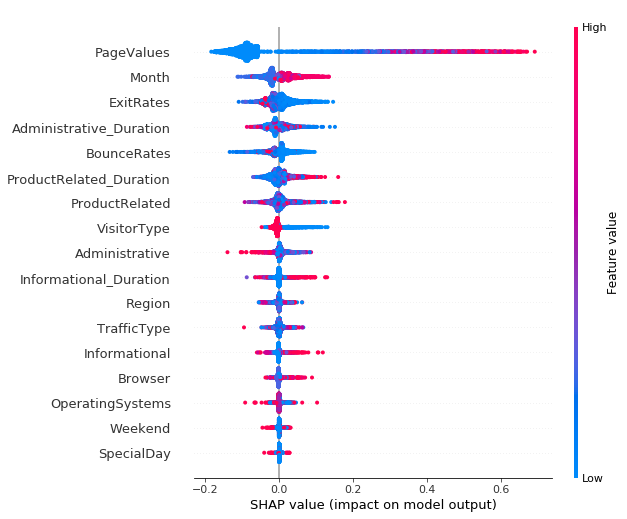

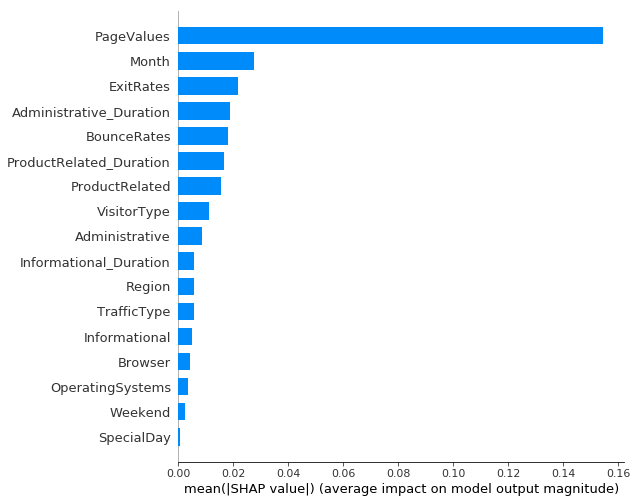

In [19]:
# let's take a look at the shap values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values[1], x_test)
shap.summary_plot(shap_values[1], x_test, plot_type='bar')

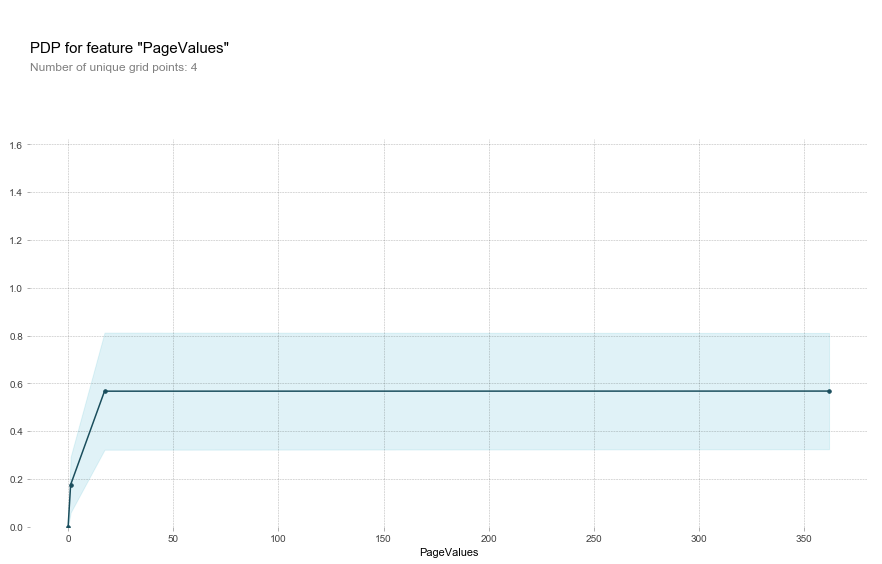

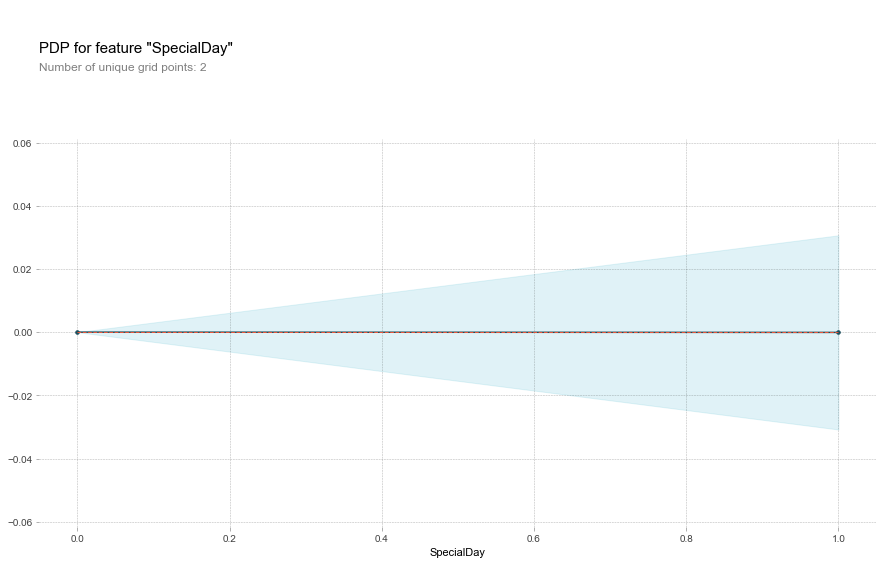

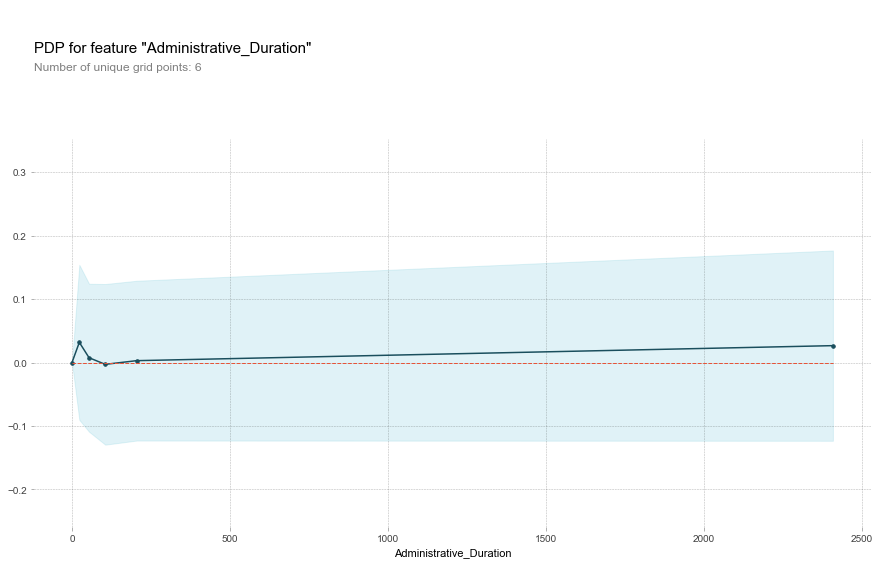

In [20]:
# plotting the partial dependence plot for adminisrative duration

# importing pdp
from pdpbox import pdp, info_plots

base_features = x_test.columns.values.tolist()

feat_name = 'PageValues'
pdp_dist = pdp.pdp_isolate(model=model, dataset=x_test, model_features = base_features, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

feat_name = 'SpecialDay'
pdp_dist = pdp.pdp_isolate(model=model, dataset=x_test, model_features = base_features, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

feat_name = 'Administrative_Duration'
pdp_dist = pdp.pdp_isolate(model=model, dataset=x_test, model_features = base_features, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

### 2. Neural Network



In [21]:
# Split data

x_train, x_test, y_train, y_test = split_data(temp_data, 0.2)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (9864, 17)
Shape of y_train : (9864,)
Shape of x_test : (2466, 17)
Shape of y_test : (2466,)


In [22]:
# Construct the Neural Network

model = keras.Sequential([
    keras.layers.Dense(40, input_shape=(x_train.shape[1],), activation=tf.nn.relu),
    keras.layers.Dense(units=1, activation=tf.nn.sigmoid)
])


W0801 19:54:57.356081 13912 deprecation.py:506] From C:\Users\Rajath Kashyap\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [23]:
# model compilation - adding loss function, optimizer and a method for metrics

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

W0801 19:54:57.455329 13912 deprecation.py:323] From C:\Users\Rajath Kashyap\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                720       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 761
Trainable params: 761
Non-trainable params: 0
_________________________________________________________________


In [24]:
stats = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Train on 9864 samples, validate on 2466 samples
Epoch 1/20
9864/9864 [==============================] - ETA: 42s - loss: 8.1612 - acc: 0.43 - ETA: 1s - loss: 5.7002 - acc: 0.6745 - ETA: 0s - loss: 3.7834 - acc: 0.726 - ETA: 0s - loss: 2.7707 - acc: 0.761 - ETA: 0s - loss: 2.3250 - acc: 0.781 - ETA: 0s - loss: 2.0515 - acc: 0.795 - ETA: 0s - loss: 1.8430 - acc: 0.805 - ETA: 0s - loss: 1.7494 - acc: 0.807 - ETA: 0s - loss: 1.6200 - acc: 0.813 - 1s 72us/sample - loss: 1.5799 - acc: 0.8171 - val_loss: 0.5179 - val_acc: 0.8642
Epoch 2/20
9864/9864 [==============================] - ETA: 1s - loss: 0.2374 - acc: 0.906 - ETA: 0s - loss: 0.5245 - acc: 0.885 - ETA: 0s - loss: 0.6031 - acc: 0.875 - ETA: 0s - loss: 0.6546 - acc: 0.867 - ETA: 0s - loss: 0.6302 - acc: 0.865 - ETA: 0s - loss: 0.7534 - acc: 0.867 - ETA: 0s - loss: 0.8260 - acc: 0.859 - ETA: 0s - loss: 0.7909 - acc: 0.861 - ETA: 0s - loss: 0.7876 - acc: 0.860 - ETA: 0s - loss: 0.7642 - acc: 0.862 - ETA: 0s - loss: 0.7578 - acc: 0.861 

9864/9864 [==============================] - ETA: 0s - loss: 0.2682 - acc: 0.968 - ETA: 0s - loss: 0.9829 - acc: 0.868 - ETA: 0s - loss: 0.7852 - acc: 0.867 - ETA: 0s - loss: 0.7365 - acc: 0.865 - ETA: 0s - loss: 0.6899 - acc: 0.869 - ETA: 0s - loss: 0.6084 - acc: 0.873 - ETA: 0s - loss: 0.5940 - acc: 0.873 - ETA: 0s - loss: 0.6110 - acc: 0.872 - 0s 50us/sample - loss: 0.6145 - acc: 0.8696 - val_loss: 0.5358 - val_acc: 0.8662
Epoch 17/20
9864/9864 [==============================] - ETA: 1s - loss: 0.5712 - acc: 0.937 - ETA: 0s - loss: 0.7634 - acc: 0.865 - ETA: 0s - loss: 0.9614 - acc: 0.855 - ETA: 0s - loss: 0.8250 - acc: 0.866 - ETA: 0s - loss: 0.7919 - acc: 0.863 - ETA: 0s - loss: 0.7807 - acc: 0.860 - ETA: 0s - loss: 0.7382 - acc: 0.863 - ETA: 0s - loss: 0.7529 - acc: 0.862 - ETA: 0s - loss: 0.7921 - acc: 0.860 - ETA: 0s - loss: 0.7794 - acc: 0.860 - 1s 55us/sample - loss: 0.7790 - acc: 0.8606 - val_loss: 0.5043 - val_acc: 0.8597
Epoch 18/20
9864/9864 [=============================

2466/2466 [==============================] - ETA: 0s - loss: 0.4814 - acc: 0.869 - 0s 2us/sample - loss: 0.4973 - acc: 0.8646
Training accuracy: 0.88665855
Testing accuracy: 0.864558
2466/2466 [==============================] - ETA: 0s - loss: 0.5681 - acc: 0.843 - 0s 19us/sample - loss: 0.4973 - acc: 0.8646


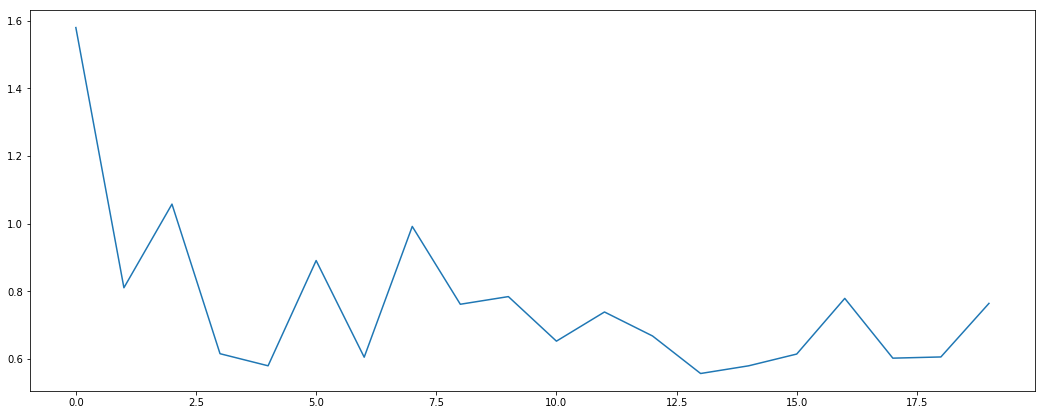

In [25]:
train_acc=model.evaluate(x_train, y_train, batch_size=1000)[1]
test_acc=model.evaluate(x_test, y_test, batch_size=1000)[1]
print("Training accuracy: %s" % train_acc)
print("Testing accuracy: %s" % test_acc)
test_loss, test_accuracy = model.evaluate(x_test, y_test)
losses= stats.history['loss']
plt.plot(range(len(losses)), losses)
plt.show()

### 3. Logistic Regression

In [26]:
x_train, x_test, y_train, y_test = split_data(temp_data, 0.3)

model = LogisticRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(model.score(x_test,y_test))

0.8686131386861314


# 4. SVM

In [27]:
x_train, x_test, y_train, y_test = split_data(temp_data, 0.3)
clf = LinearSVC().fit(x_train, y_train) 
svm_predict=clf.predict(x_test)
print(accuracy_score(y_test,svm_predict))

0.8237361449040281
